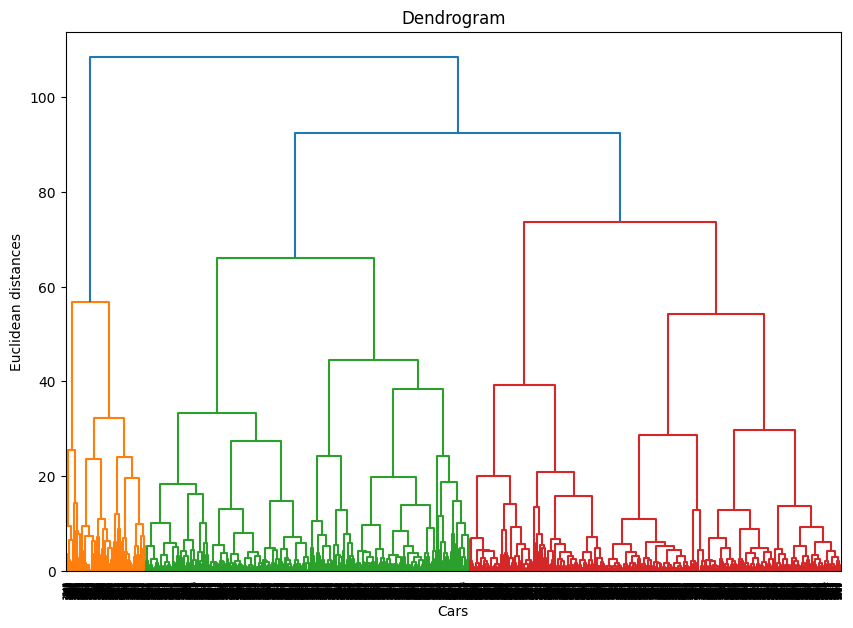

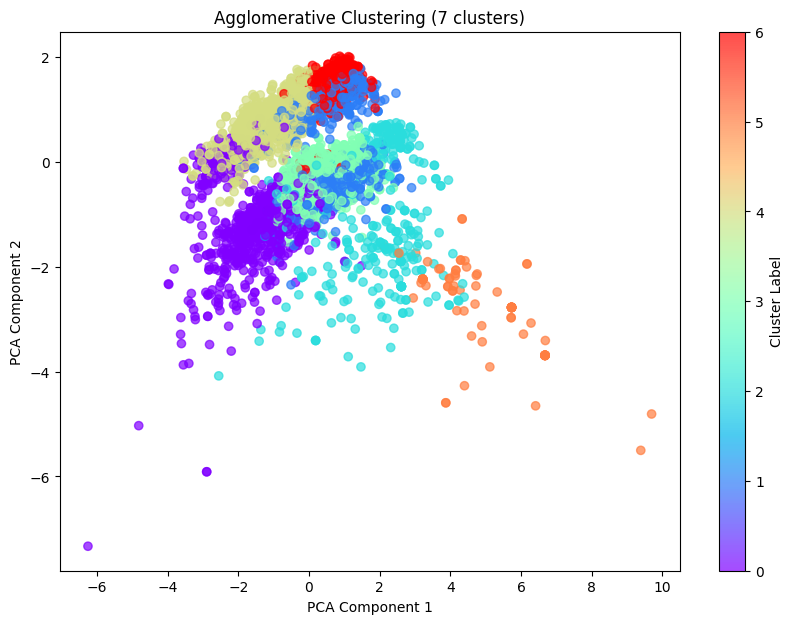

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  Cluster  
0  Individual       Manual   First Owner        4  
1  Individual       Manual   First Owner        4  
2  Individual       Manual   First Owner        3  
3  Individual       Manual   First Owner        6  
4  Individual       Manual  Second Owner        0  


In [2]:
#Implement a Hierarchical Clustering Algorithm.
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Load the dataset
data = pd.read_csv('assign8.csv')  # Replace with your actual file name

# Select relevant features for clustering
# Example: Using 'year', 'selling_price', 'km_driven' and encoding 'fuel', 'seller_type', 'transmission', 'owner'
features = data[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']].copy()

# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    features.loc[:, col] = le.fit_transform(features[col])

# Standardize the features for better performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Visualize the Dendrogram to find the optimal number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Cars')
plt.ylabel('Euclidean distances')
plt.show()

# Fit the Agglomerative Clustering model
# Adjusting the number of clusters based on the dendrogram (e.g., 7)
hc = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(scaled_features)

# Add cluster labels to the original dataset
data['Cluster'] = y_hc

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a scatter plot with PCA components
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data['Cluster'], cmap='rainbow', alpha=0.7)
plt.title('Agglomerative Clustering (7 clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Display the first few rows of the dataset with clusters
print(data.head())
